![ebac_logo-data_science](https://github.com/LucRib9/Ciencia_de_Dados_EBAC/assets/127044748/83baba6a-a2d6-47d2-a5ef-bd7e5ce7b7a7)
___
Aluno: Lucas Antonio de Sousa Ribeiro

LinkedIn: www.linkedin.com/in/lucas-data-science

GitHub: https://github.com/LucRib9
___

## Previsão do Nível de Ansiedade

## Entendimento do Negócio

Na sociedade atual, as pessoas estão cada vez mais propensas a terem crises de ansiedade, devido a fatores como o nível de stress, noites mal-dormidas, fumo, alto consumo de cafeína, além de outros fatores prejudiciais no dia-a-dia. Neste projeto serão analisados os níveis das crises de ansiedade informadas por 12000 pessoas de acordo com os fatores mencionados. Além de realizar uma previsão do nível da crise que a pessoa está propensa a ter por meio da utilização de Machine Learning. 

Os dados foram obtidos no site kaggle, disponíveis neste link: [Anxiety-Attack-Factors](https://www.kaggle.com/datasets/ashaychoudhary/anxiety-attack-factors-symptoms-and-severity/data).

## Entendimento dos Dados

Cada pessoa informou sobre 20 variáveis relativas a ela. Tais variáveis estão presentes na tabela abaixo com seus respectivos significados e tipos.

### Dicionário de dados

| Variável | Descrição | Tipo |
|  ---     | ---       | ---  |
|ID | Número de identificação da pessoa| Númerica|
|Age| Idade |  Númerica|
|Gender | Gênero| Categórica|
|Occupation | Profissão| Catgórica|
|Sleep Hours | Horas de Sono|Numérica |
| Physical Activity (hrs/week)| Quantidade de horas de atividade física semanal | Numérica|
|Caffeine Intake (mg/day) | Quantidade de cafeína diária | Numérica |
|Alcohol Consumption (drinks/week) | Consumo de álcool semanal| Numérica|
| Smoking| Informa se a pessoa Fuma| Booleana | 
|Family History of Anxiety | Histórico familiar de ansiedade| Booleana|
|Stress Level (1-10) | Nível de Stress do paciente| Numérica|
|Heart Rate (bpm during attack) | Palpitações durante a crise| Numérica|
| Breathing Rate (breaths/min)| Taxa de respiração durante a crise | Numérica|
| Sweating Level (1-5)| Nível de suor|Numérica |
|Dizziness | Tontura durante a crise|Booleana |
|Medication | Se a pessoa toma medicamentos para a ansiedade|Booleana |
|Therapy Sessions (per month) | Número de sessoes de terapia mensais | Numérica|
|Recent Major Life Event | Informa se houve algum evento recente traumático | Booleana|
|Diet Quality (1-10) | Qualidade da dieta da pessoa | Numérica|
|Severity of Anxiety Attack (1-10) | Grau de severidade da crise de ansiedade|Numérica |


## Pacotes Necessários

In [5]:
# Faz o import dos pacotes usados nesse projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

## 1. Importação da Base de Dados

In [7]:
# Importa a base de dados como "df"
df = pd.read_csv('anxiety_attack_dataset.csv', sep=',')

# Mostra as primeiras linhas do 'df'
df.head()

ID  Age  Gender Occupation  Sleep Hours  Physical Activity (hrs/week)  \
0   1   56  Female      Other          9.6                           8.3   
1   2   46    Male    Teacher          6.4                           7.3   
2   3   32  Female     Doctor          6.9                           1.0   
3   4   60    Male     Doctor          9.2                           3.7   
4   5   25    Male    Student          9.2                           2.5   

   Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week) Smoking  \
0                       175                                  6      No   
1                        97                                  6      No   
2                       467                                 14      No   
3                       471                                 16      No   
4                       364                                  2      No   

  Family History of Anxiety  Stress Level (1-10)  \
0                        No                    4   
1                        No                    3   
2                        No                    2   
3                       Yes                    6   
4                       Yes                    7   

   Heart Rate (bpm during attack)  Breathing Rate (breaths/min)  \
0                             145                            33   
1                             143                            18   
2                              60                            34   
3                              94                            19   
4                             152                            15   

   Sweating Level (1-5) Dizziness Medication  Therapy Sessions (per month)  \
0                     3        No         No                             4   
1                     5       Yes         No                             0   
2                     1        No         No                             7   
3                     1        No        Yes                             4   
4                     4        No        Yes                             0   

  Recent Major Life Event  Diet Quality (1-10)  \
0                     Yes                    9   
1                      No                    9   
2                     Yes                   10   
3                     Yes                    5   
4                      No                    1   

   Severity of Anxiety Attack (1-10)  
0                                 10  
1                                  8  
2                                  5  
3                                  8  
4                                  1

> A variável "ID" não influenciará neste projeto, logo, ela será removida da base de dados.

In [9]:
# Remove a variável 'ID'
df.drop(labels = 'ID', axis = 1, inplace=True)

In [10]:
# Imprime as dimensões do df
dim = df.shape
print(f'Número de linhas: {dim[0]} \nNúmero de colunas: {dim[1]}')

Número de linhas: 12000 
Número de colunas: 19


In [11]:
# Informa os tipos de variáveis e quantidade de não nulos no df 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                12000 non-null  int64  
 1   Gender                             12000 non-null  object 
 2   Occupation                         12000 non-null  object 
 3   Sleep Hours                        12000 non-null  float64
 4   Physical Activity (hrs/week)       12000 non-null  float64
 5   Caffeine Intake (mg/day)           12000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 7   Smoking                            12000 non-null  object 
 8   Family History of Anxiety          12000 non-null  object 
 9   Stress Level (1-10)                12000 non-null  int64  
 10  Heart Rate (bpm during attack)     12000 non-null  int64  
 11  Breathing Rate (breaths/min)       12000 non-null  int

> Os resultados mostram que há 12 variáveis numéricas, 7 variáveis qualitativas e não há valores nulos. 

## 2. Descritiva básica univariada

### 2.1. Variáveis Quantitativas

In [15]:
# Seleciona as variáveis numéricas
quant = df.select_dtypes(include=['int64', 'float64']).columns

In [16]:
# Imprime a análise das variáveis quantitativas (média, mediana, contagem, etc)
df[quant].describe().round(2)

Age  Sleep Hours  Physical Activity (hrs/week)  \
count  12000.00     12000.00                      12000.00   
mean      40.97         6.48                          5.03   
std       13.47         2.01                          2.89   
min       18.00         3.00                          0.00   
25%       29.00         4.80                          2.50   
50%       41.00         6.50                          5.00   
75%       53.00         8.20                          7.52   
max       64.00        10.00                         10.00   

       Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week)  \
count                  12000.00                           12000.00   
mean                     246.70                               9.49   
std                      144.49                               5.77   
min                        0.00                               0.00   
25%                      122.00                               5.00   
50%                      244.00                               9.00   
75%                      371.00                              15.00   
max                      499.00                              19.00   

       Stress Level (1-10)  Heart Rate (bpm during attack)  \
count             12000.00                        12000.00   
mean                  5.46                          119.40   
std                   2.90                           34.81   
min                   1.00                           60.00   
25%                   3.00                           89.00   
50%                   5.00                          119.00   
75%                   8.00                          149.00   
max                  10.00                          179.00   

       Breathing Rate (breaths/min)  Sweating Level (1-5)  \
count                      12000.00              12000.00   
mean                          25.46                  2.99   
std                            8.09                  1.41   
min                           12.00                  1.00   
25%                           18.00                  2.00   
50%                           25.00                  3.00   
75%                           32.00                  4.00   
max                           39.00                  5.00   

       Therapy Sessions (per month)  Diet Quality (1-10)  \
count                      12000.00             12000.00   
mean                           4.52                 5.50   
std                            2.87                 2.87   
min                            0.00                 1.00   
25%                            2.00                 3.00   
50%                            5.00                 5.00   
75%                            7.00                 8.00   
max                            9.00                10.00   

       Severity of Anxiety Attack (1-10)  
count                           12000.00  
mean                                5.51  
std                                 2.86  
min                                 1.00  
25%                                 3.00  
50%                                 6.00  
75%                                 8.00  
max                                10.00

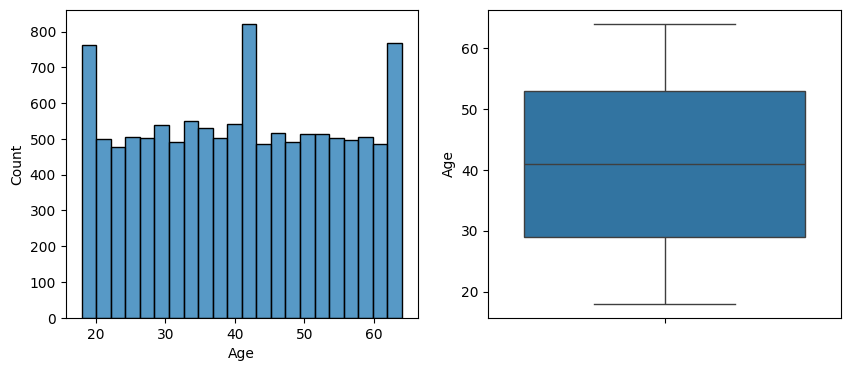

In [17]:
# Gráfico boxplot e contagem da variável 'Age' 
plt.rc('figure', figsize=(10, 4))
fig, ax = plt.subplots(1, 2)

# Calcula os gráficos
sns.histplot(x='Age', data=df, ax = ax[0])
sns.boxplot(y='Age', data=df, ax = ax[1])


# Mostra os gráficos
plt.show()

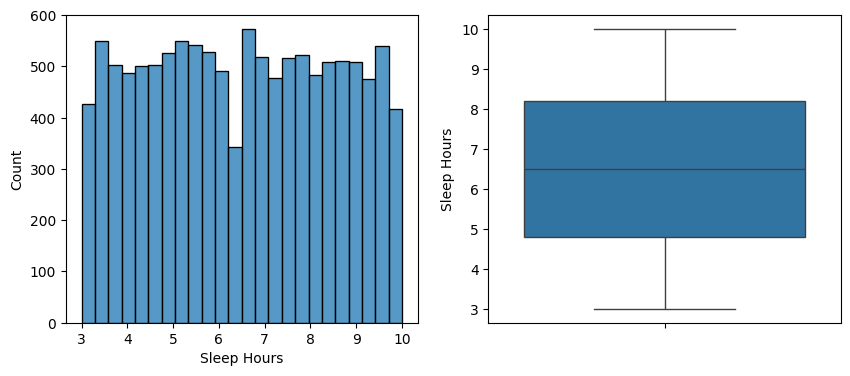

In [18]:
# Gráfico boxplot e contagem da variável 'Sleep Hours' 
plt.rc('figure', figsize=(10, 4))
fig, ax = plt.subplots(1, 2)

# Calcula os gráficos
sns.histplot(x='Sleep Hours', data=df, ax = ax[0])
sns.boxplot(y='Sleep Hours', data=df, ax = ax[1])

# Mostra os gráficos
plt.show()

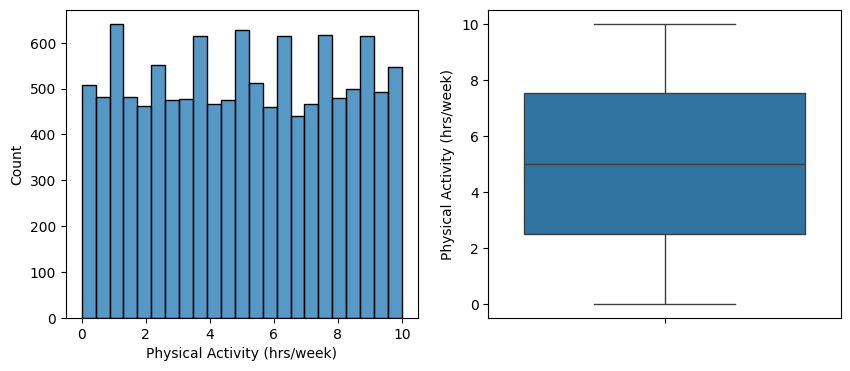

In [19]:
# Gráfico boxplot e contagem da variável 'Physical Activity (hrs/week)' 
plt.rc('figure', figsize=(10, 4))
fig, ax = plt.subplots(1, 2)

# Calcula os gráficos
sns.histplot(x='Physical Activity (hrs/week)', data=df, ax = ax[0])
sns.boxplot(y='Physical Activity (hrs/week)', data=df, ax = ax[1])

# Mostra os gráficos
plt.show()

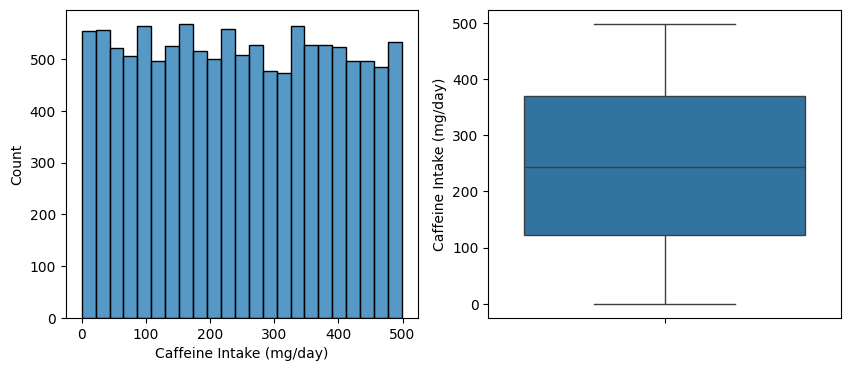

In [20]:
# Gráfico boxplot e contagem da variável 'Caffeine Intake (mg/day)' 
plt.rc('figure', figsize=(10, 4))
fig, ax = plt.subplots(1, 2)

# Calcula os gráficos
sns.histplot(x='Caffeine Intake (mg/day)', data=df, ax = ax[0])
sns.boxplot(y='Caffeine Intake (mg/day)', data=df, ax = ax[1])

# Mostra os gráficos
plt.show()

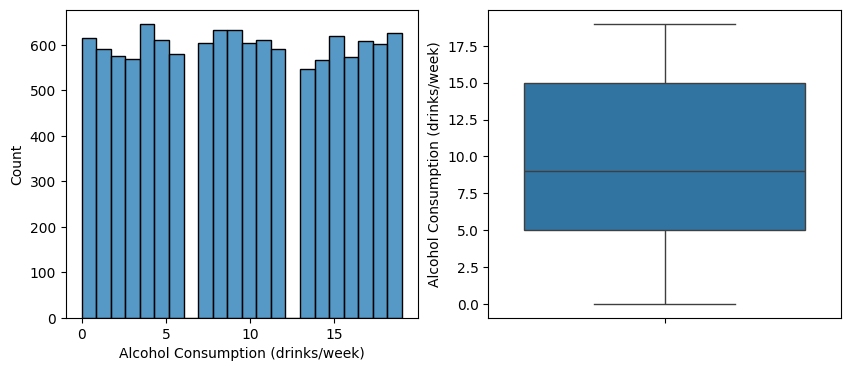

In [21]:
# Gráfico boxplot e contagem da variável 'Alcohol Consumption (drinks/week)' 
plt.rc('figure', figsize=(10, 4))
fig, ax = plt.subplots(1, 2)

# Calcula os gráficos
sns.histplot(x='Alcohol Consumption (drinks/week)', data=df, ax = ax[0])
sns.boxplot(y='Alcohol Consumption (drinks/week)', data=df, ax = ax[1])

# Mostra os gráficos
plt.show()

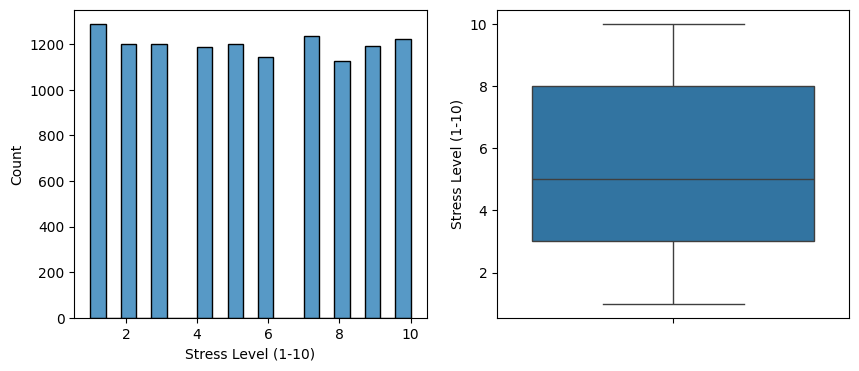

In [22]:
# Gráfico boxplot e contagem da variável 'Stress Level (1-10)' 
plt.rc('figure', figsize=(10, 4))
fig, ax = plt.subplots(1, 2)

# Calcula os gráficos
sns.histplot(x='Stress Level (1-10)', data=df, ax = ax[0])
sns.boxplot(y='Stress Level (1-10)', data=df, ax = ax[1])

# Mostra os gráficos
plt.show()

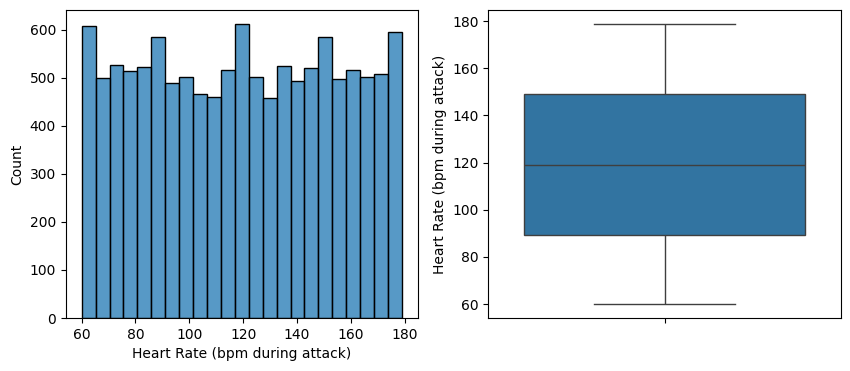

In [23]:
# Gráfico boxplot e contagem da variável 'Heart Rate (bpm during attack)' 
plt.rc('figure', figsize=(10, 4))
fig, ax = plt.subplots(1, 2)

# Calcula os gráficos
sns.histplot(x='Heart Rate (bpm during attack)', data=df, ax = ax[0])
sns.boxplot(y='Heart Rate (bpm during attack)', data=df, ax = ax[1])

# Mostra os gráficos
plt.show()

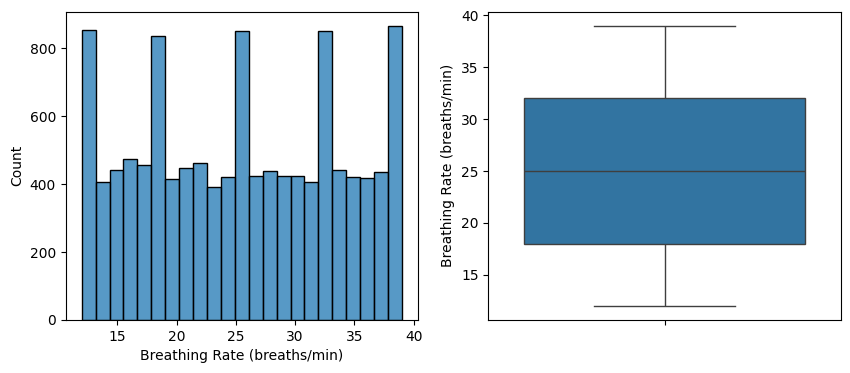

In [24]:
# Gráfico boxplot e contagem da variável 'Breathing Rate (breaths/min)' 
plt.rc('figure', figsize=(10, 4))
fig, ax = plt.subplots(1, 2)

# Calcula os gráficos
sns.histplot(x='Breathing Rate (breaths/min)', data=df, ax = ax[0])
sns.boxplot(y='Breathing Rate (breaths/min)', data=df, ax = ax[1])

# Mostra os gráficos
plt.show()

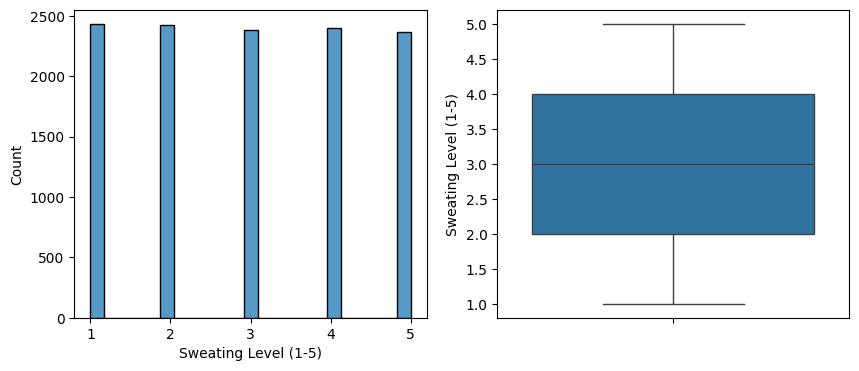

In [25]:
# Gráfico boxplot e contagem da variável 'Sweating Level (1-5)' 
plt.rc('figure', figsize=(10, 4))
fig, ax = plt.subplots(1, 2)

# Calcula os gráficos
sns.histplot(x='Sweating Level (1-5)', data=df, ax = ax[0])
sns.boxplot(y='Sweating Level (1-5)', data=df, ax = ax[1])

# Mostra os gráficos
plt.show()

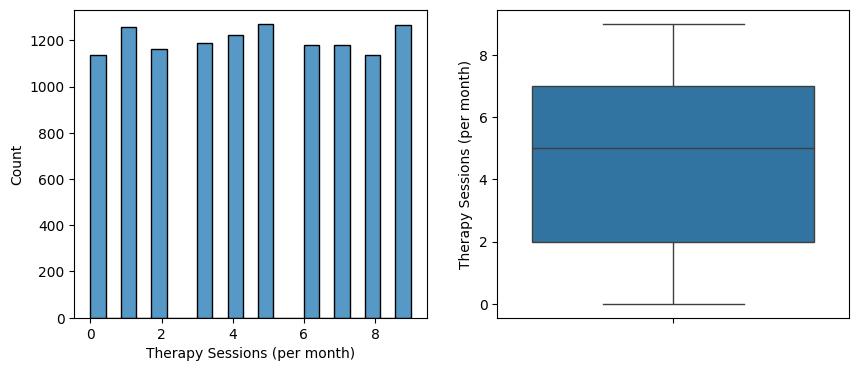

In [26]:
# Gráfico boxplot e contagem da variável 'Therapy Sessions (per month)' 
plt.rc('figure', figsize=(10, 4))
fig, ax = plt.subplots(1, 2)

# Calcula os gráficos
sns.histplot(x='Therapy Sessions (per month)', data=df, ax = ax[0])
sns.boxplot(y='Therapy Sessions (per month)', data=df, ax = ax[1])

# Mostra os gráficos
plt.show()

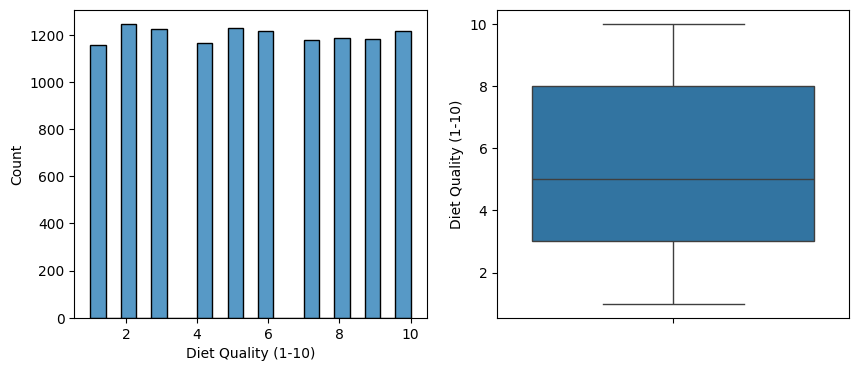

In [27]:
# Gráfico boxplot e contagem da variável 'Diet Quality (1-10)' 
plt.rc('figure', figsize=(10, 4))
fig, ax = plt.subplots(1, 2)

# Calcula os gráficos
sns.histplot(x='Diet Quality (1-10)', data=df, ax = ax[0])
sns.boxplot(y='Diet Quality (1-10)', data=df, ax = ax[1])

# Mostra os gráficos
plt.show()

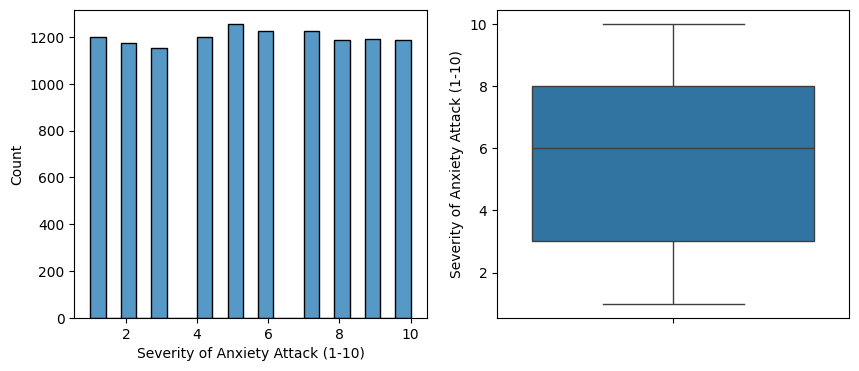

In [28]:
# Gráfico boxplot e contagem da variável 'Severity of Anxiety Attack (1-10)' 
plt.rc('figure', figsize=(10, 4))
fig, ax = plt.subplots(1, 2)

# Calcula os gráficos
sns.histplot(x='Severity of Anxiety Attack (1-10)', data=df, ax = ax[0])
sns.boxplot(y='Severity of Anxiety Attack (1-10)', data=df, ax = ax[1])

# Mostra os gráficos
plt.show()

### 2.2. Variáveis Qualitativas

In [30]:
# Seleciona as variáveis qualitativas
quali = df.select_dtypes(include=['object']).columns

In [31]:
# Faz a descrição das variáveis qualitativas
df[quali].describe()

Gender  Occupation Smoking Family History of Anxiety Dizziness  \
count    12000       12000   12000                     12000     12000   
unique       3           6       2                         2         2   
top     Female  Unemployed      No                        No        No   
freq      5809        2139    8417                      7179      8406   

       Medication Recent Major Life Event  
count       12000                   12000  
unique          2                       2  
top            No                      No  
freq         9605                    9054

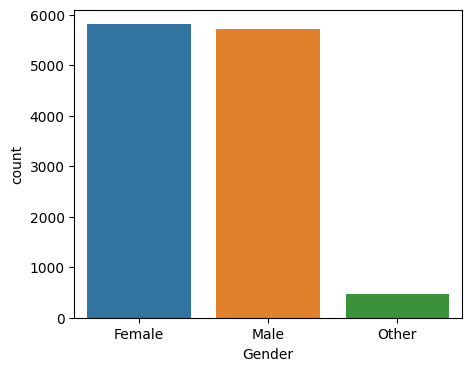

In [32]:
# Prepara a figura
plt.rc('figure', figsize=(5,4))

# Prepara o gráfico de contagem
sns.countplot(x='Gender', data=df, hue='Gender')

# Imprime o gráfico
plt.show()

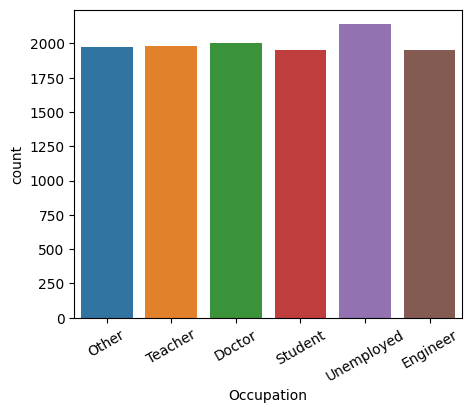

In [33]:
# Prepara a figura
plt.rc('figure', figsize=(5,4))

# Prepara o gráfico de contagem
sns.countplot(x='Occupation', data=df, hue='Occupation')
plt.tick_params(axis='x', rotation=30)

# Imprime o gráfico
plt.show()

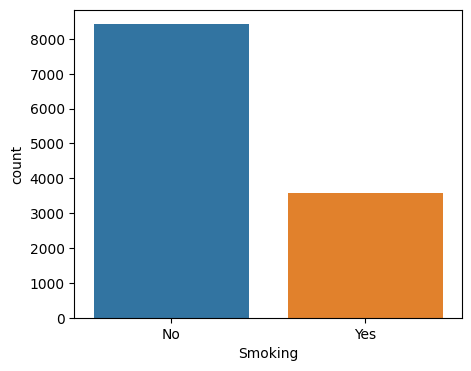

In [34]:
# Prepara a figura
plt.rc('figure', figsize=(5,4))

# Prepara o gráfico de contagem
sns.countplot(x='Smoking', data=df, hue='Smoking')

# Imprime o gráfico
plt.show()

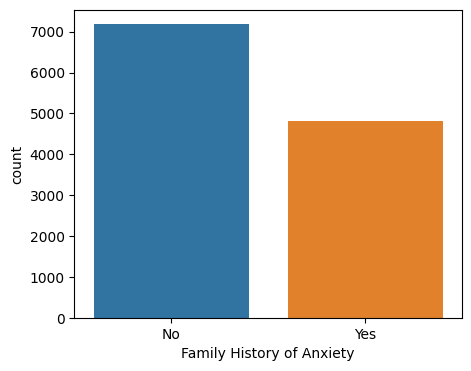

In [35]:
# Prepara a figura
plt.rc('figure', figsize=(5,4))

# Prepara o gráfico de contagem
sns.countplot(x='Family History of Anxiety', data=df, hue='Family History of Anxiety')

# Imprime o gráfico
plt.show()

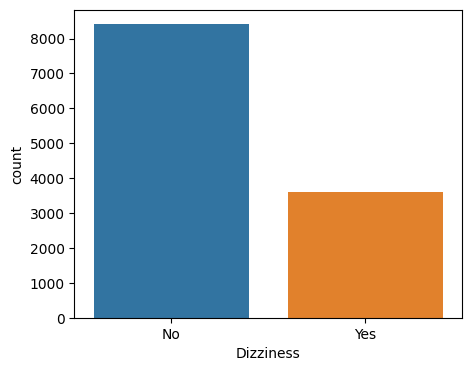

In [36]:
# Prepara a figura
plt.rc('figure', figsize=(5,4))

# Prepara o gráfico de contagem
sns.countplot(x='Dizziness', data=df, hue='Dizziness')

# Imprime o gráfico
plt.show()

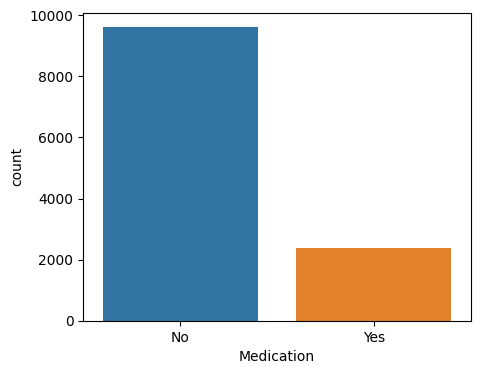

In [37]:
# Prepara a figura
plt.rc('figure', figsize=(5,4))

# Prepara o gráfico de contagem
sns.countplot(x='Medication', data=df, hue='Medication')

# Imprime o gráfico
plt.show()

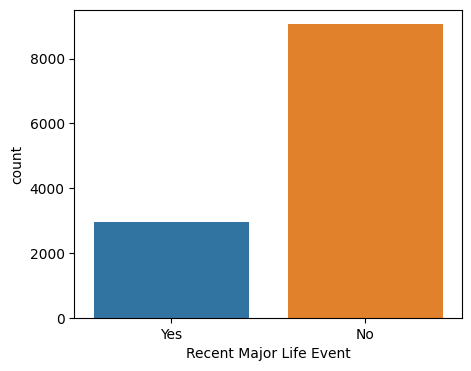

In [38]:
# Prepara a figura
plt.rc('figure', figsize=(5,4))

# Prepara o gráfico de contagem
sns.countplot(x='Recent Major Life Event', data=df, hue='Recent Major Life Event')

# Imprime o gráfico
plt.show()

## 3. Descritiva Bivariada

### 3.1. Bivariada das Variáveis Quantitativas

#### 3.1.1. Matriz de Dispersão

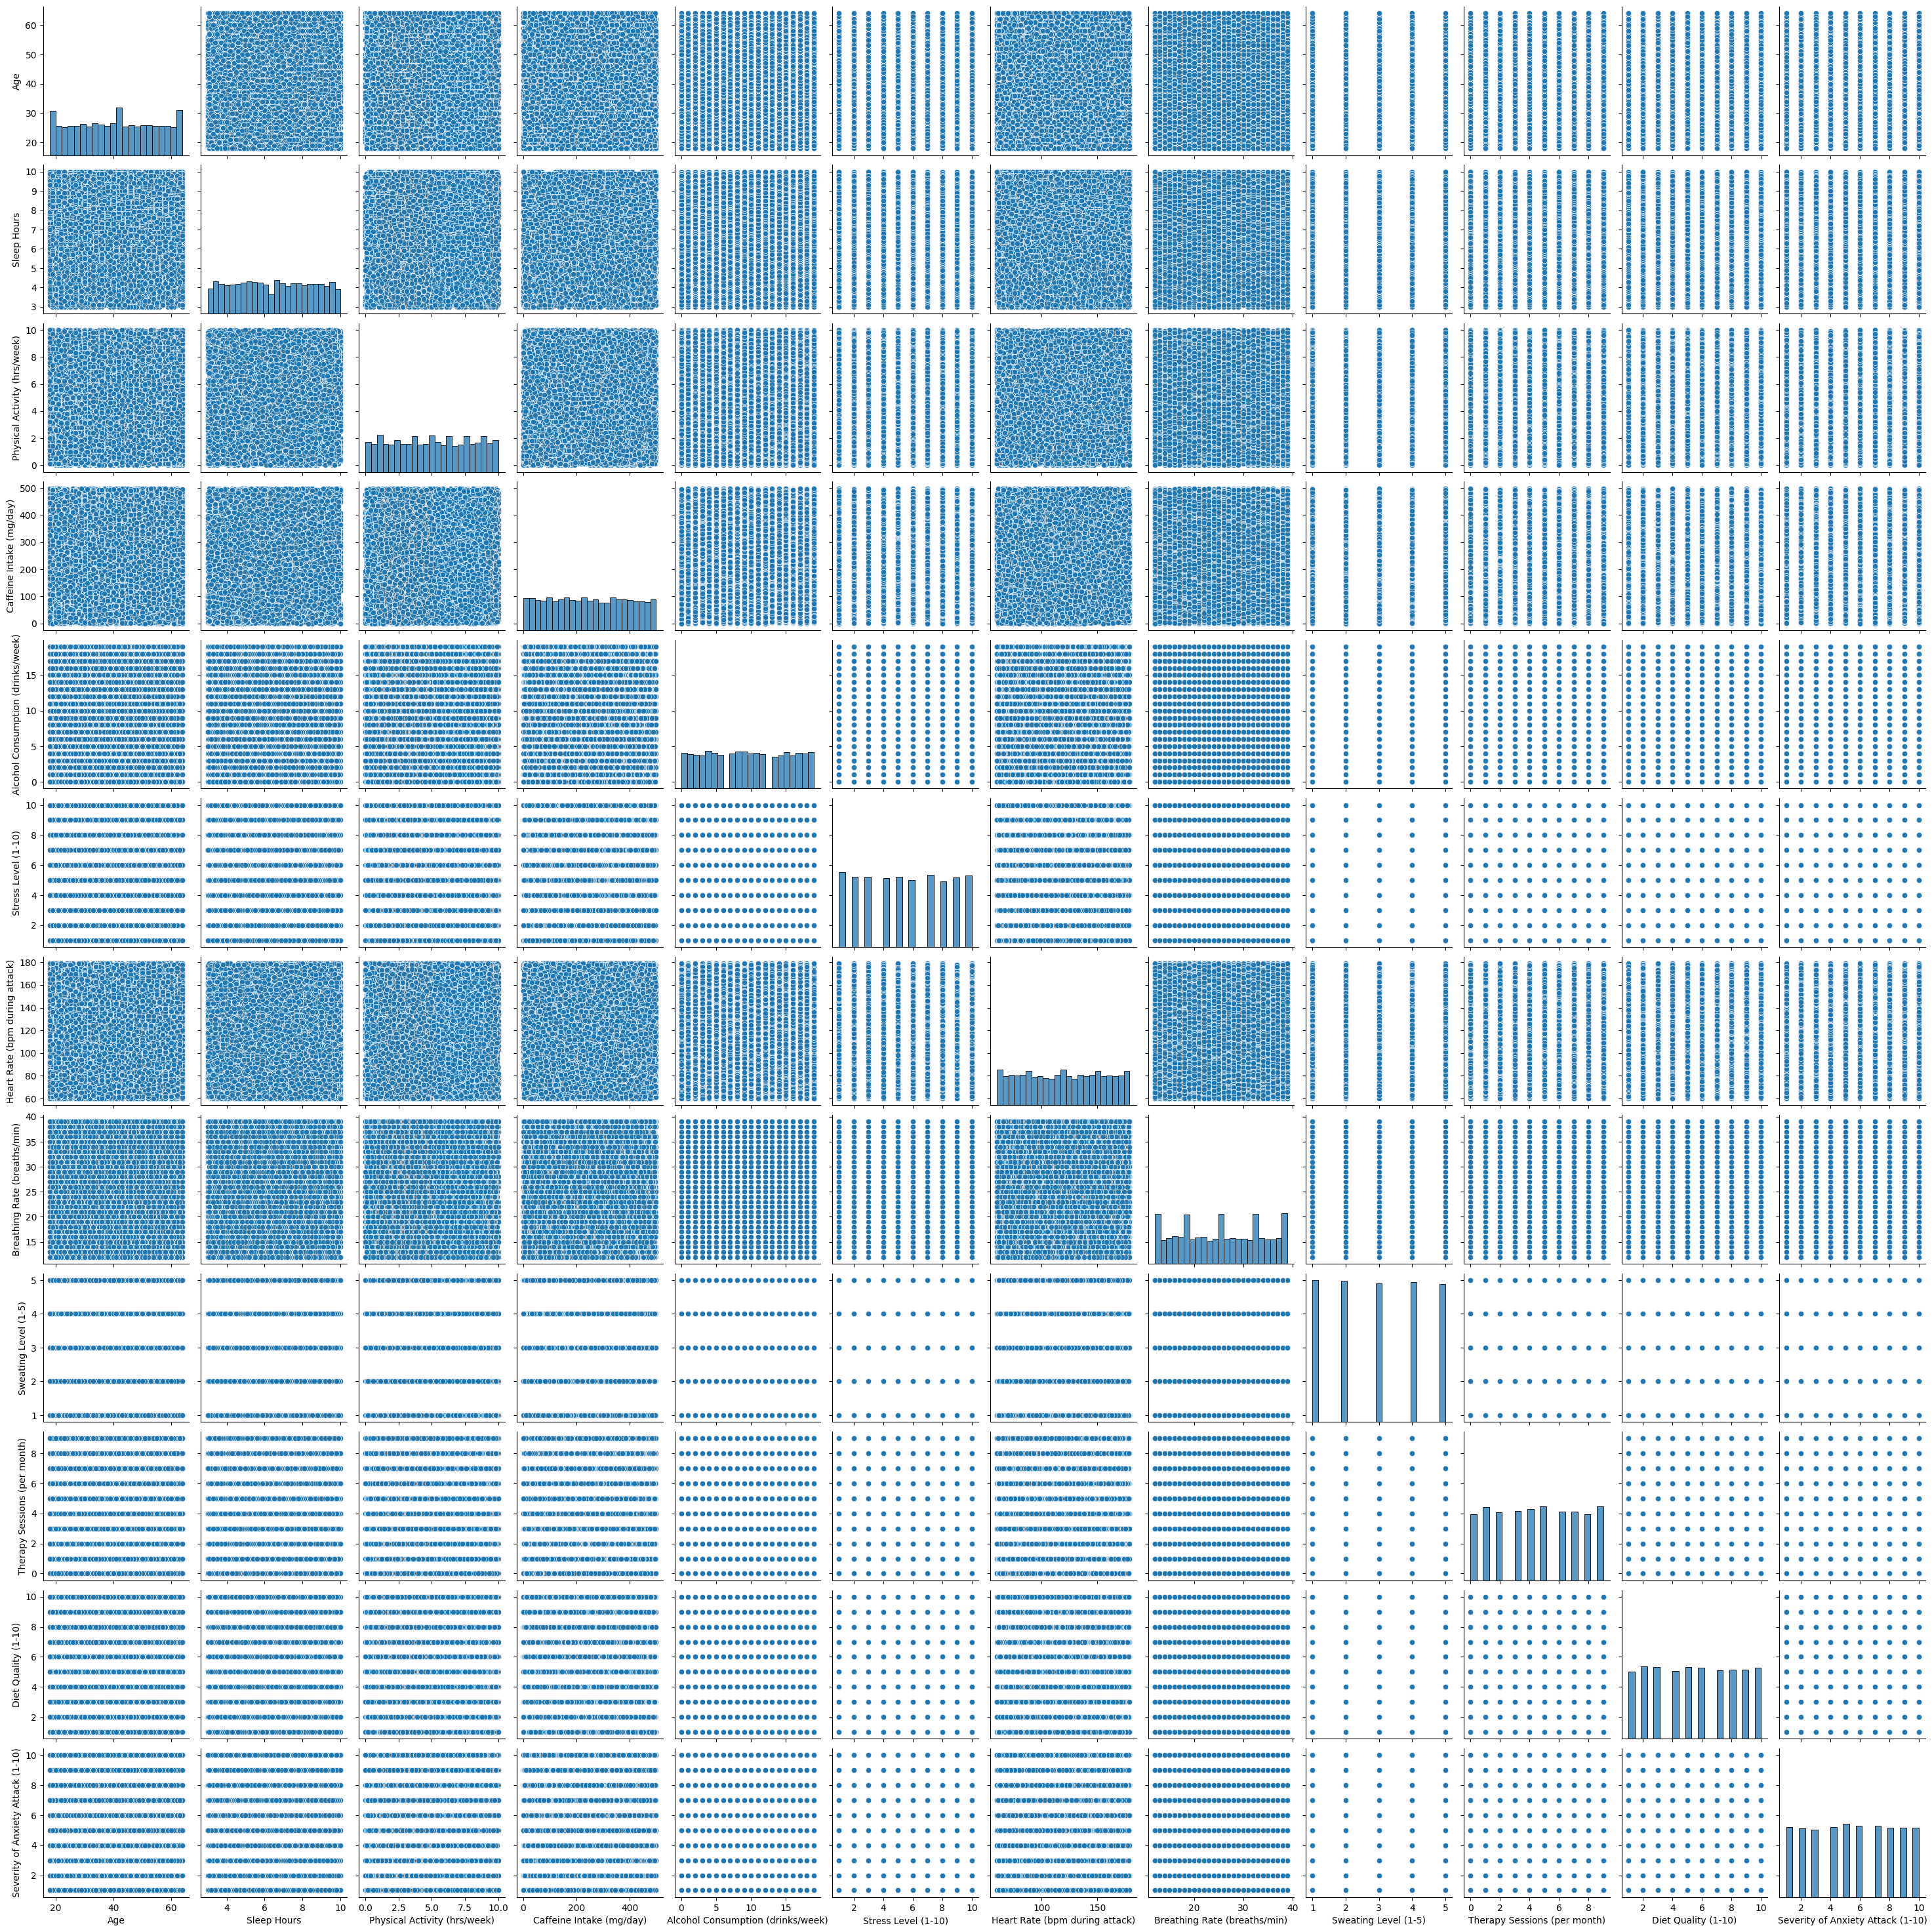

In [42]:
# Prepara a matriz de dispersão com as variáveis quantitativas
sns.pairplot(df[quant])

# Imprime a matriz
plt.show()

#### 3.1.2. Matriz de Correlação

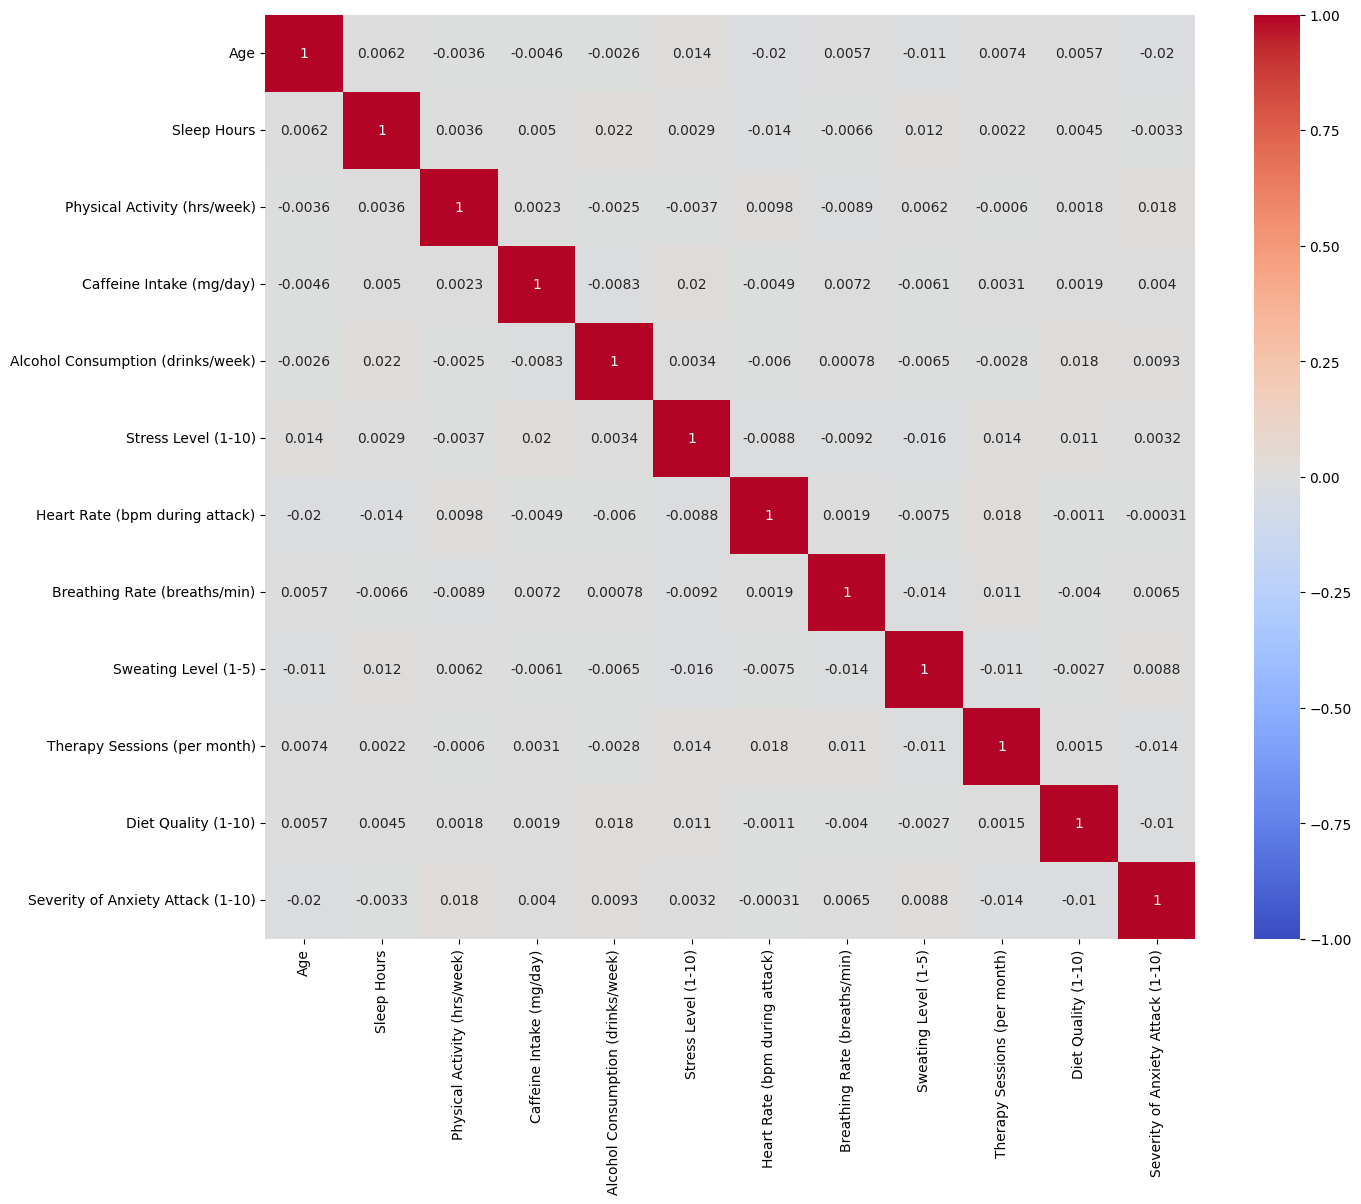

In [44]:
# Ajusta o tamanho da figura
plt.figure(figsize=(15, 12))

# Calcula a correlação das variáveis numéricas
corr = df[quant].corr()

# Imprime a matriz de correlação
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='coolwarm')

> As duas matrizes mostram que não há influências evidentes entre a variável resposta 'Severity of Anxiety Attack (1-10)' e as variáveis explicativas numéricas.

### 3.2 Variáveis Qualitativas

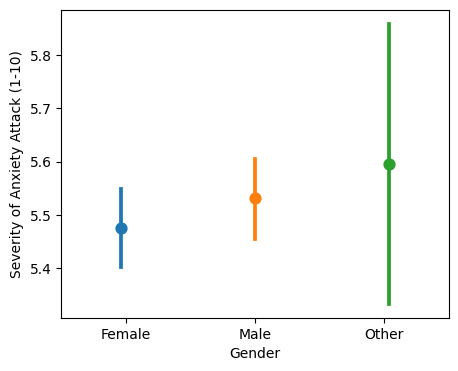

In [47]:
# Prepara a figura para a variável 'Gender'
plt.rc('figure', figsize=(5,4))

# Prepara o gráfico de contagem
sns.pointplot(x='Gender', y='Severity of Anxiety Attack (1-10)', 
              data=df, hue='Gender', dodge=True, errorbar=('ci',95))

# Imprime o gráfico
plt.show()

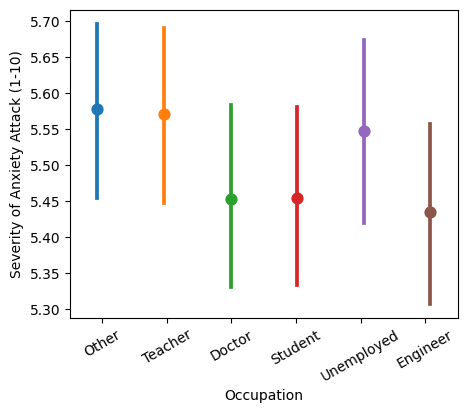

In [48]:
# Prepara a figura para a variável 'Occupation'
plt.rc('figure', figsize=(5,4))

# Prepara o gráfico de contagem
sns.pointplot(x='Occupation', y='Severity of Anxiety Attack (1-10)', 
              data=df, hue='Occupation', dodge=True, errorbar=('ci',95))
plt.tick_params(axis='x', rotation=30)

# Imprime o gráfico
plt.show()

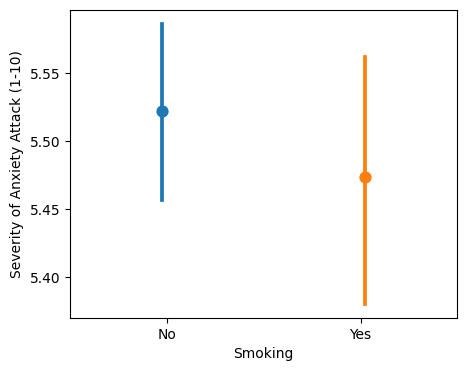

In [49]:
# Prepara a figura para a variável 'Smoking'
plt.rc('figure', figsize=(5,4))

# Prepara o gráfico de contagem
sns.pointplot(x='Smoking', y='Severity of Anxiety Attack (1-10)', 
              data=df, hue='Smoking', dodge=True, errorbar=('ci',95))

# Imprime o gráfico
plt.show()

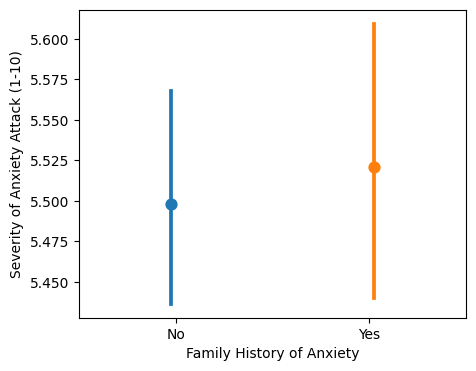

In [50]:
# Prepara a figura para a variável 'Family History of Anxiety'
plt.rc('figure', figsize=(5,4))

# Prepara o gráfico de contagem
sns.pointplot(x='Family History of Anxiety', y='Severity of Anxiety Attack (1-10)', 
              data=df, hue='Family History of Anxiety', dodge=True, errorbar=('ci',95))

# Imprime o gráfico
plt.show()

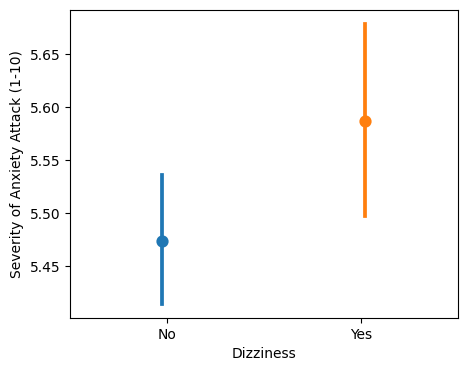

In [51]:
# Prepara a figura para a variável 'Dizziness'
plt.rc('figure', figsize=(5,4))

# Prepara o gráfico de contagem
sns.pointplot(x='Dizziness', y='Severity of Anxiety Attack (1-10)', 
              data=df, hue='Dizziness', dodge=True, errorbar=('ci',95))

# Imprime o gráfico
plt.show()

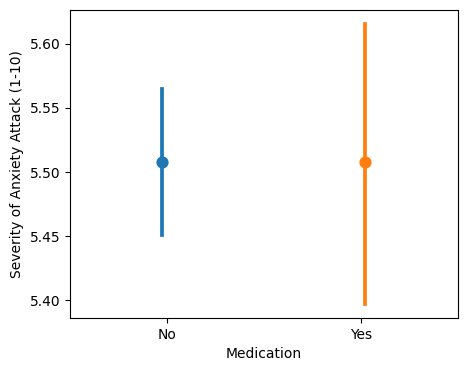

In [52]:
# Prepara a figura para a variável 'Medication'
plt.rc('figure', figsize=(5,4))

# Prepara o gráfico de contagem
sns.pointplot(x='Medication', y='Severity of Anxiety Attack (1-10)', 
              data=df, hue='Medication', dodge=True, errorbar=('ci',95))

# Imprime o gráfico
plt.show()

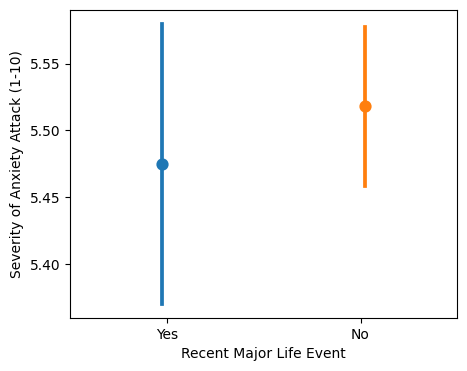

In [53]:
# Prepara a figura para a variável 'Gender'
plt.rc('figure', figsize=(5,4))

# Prepara o gráfico de contagem
sns.pointplot(x='Recent Major Life Event', y='Severity of Anxiety Attack (1-10)', 
              data=df, hue='Recent Major Life Event', dodge=True, errorbar=('ci',95))

# Imprime o gráfico
plt.show()

> A análise descritiva bivariada das variáveis qualitativas também não apresentou influência significativa sobre a variável resposta por cada categoria das variáveis explicativas, uma vez que todas estão no mesmo intervalo de confiança.

## 4. Preparação dos Dados 
- **Seleção**: Todas as variáveis da base de dados serão usadas, com excessão da 'ID' que já foi removida.
- **Limpeza**: Não foram detectados valores faltantes ou outliers na base de dados.
- **Construção de novas variáveis**: Não é necessário criar novas variáveis.
- **Integração**: Há apenas uma base de dados, logo, não é preciso uma integração.
- **Formatação**: As variáveis numéricas serão formatadas pela distribuição normal; em relação às variáveis categóricas, elas serão transformadas em variáveis dummies. Por fim, será realizado um PCA com o menor número de Principais Componentes necessárias.

In [56]:
# Separa as variáveis explicativas da variável resposta
X = df.drop(columns='Severity of Anxiety Attack (1-10)')
y = df['Severity of Anxiety Attack (1-10)'].copy()

In [57]:
# Transforma as variáveis categóricas em booleanas 
dummies = pd.get_dummies(X[quali], drop_first=True).astype(int)

In [58]:
# Remove as variáveis categóricas da base explicativa
X.drop(columns=quali, inplace=True)

In [59]:
# Normaliza as variáveis numéricas 
colunas = X.columns
scaler = StandardScaler() 
scaler.fit(X)
X = pd.DataFrame(data=scaler.transform(X), columns=colunas)

In [60]:
# Junta as variáveis numéricas normalizadas com as variáveis dummies
X = X.join(dummies)

In [61]:
# Verificando os resultados
X.head()

Age  Sleep Hours  Physical Activity (hrs/week)  \
0  1.115829     1.547225                      1.131618   
1  0.373588    -0.041021                      0.785463   
2 -0.665549     0.207142                     -1.395313   
3  1.412725     1.348694                     -0.460695   
4 -1.185117     1.348694                     -0.876081   

   Caffeine Intake (mg/day)  Alcohol Consumption (drinks/week)  \
0                 -0.496232                          -0.605436   
1                 -1.036095                          -0.605436   
2                  1.524795                           0.781257   
3                  1.552480                           1.127930   
4                  0.811898                          -1.298782   

   Stress Level (1-10)  Heart Rate (bpm during attack)  \
0            -0.504732                        0.735564   
1            -0.849907                        0.678102   
2            -1.195082                       -1.706595   
3             0.185618                       -0.729732   
4             0.530793                        0.936683   

   Breathing Rate (breaths/min)  Sweating Level (1-5)  \
0                      0.931686              0.008896   
1                     -0.922375              1.422901   
2                      1.055290             -1.405108   
3                     -0.798771             -1.405108   
4                     -1.293187              0.715899   

   Therapy Sessions (per month)  ...  Occupation_Engineer  Occupation_Other  \
0                     -0.180892  ...                    0                 1   
1                     -1.576619  ...                    0                 0   
2                      0.865903  ...                    0                 0   
3                     -0.180892  ...                    0                 0   
4                     -1.576619  ...                    0                 0   

   Occupation_Student  Occupation_Teacher  Occupation_Unemployed  Smoking_Yes  \
0                   0                   0                      0            0   
1                   0                   1                      0            0   
2                   0                   0                      0            0   
3                   0                   0                      0            0   
4                   1                   0                      0            0   

   Family History of Anxiety_Yes  Dizziness_Yes  Medication_Yes  \
0                              0              0               0   
1                              0              1               0   
2                              0              0               0   
3                              1              0               1   
4                              1              0               1   

   Recent Major Life Event_Yes  
0                            1  
1                            0  
2                            1  
3                            1  
4                            0  

[5 rows x 23 columns]

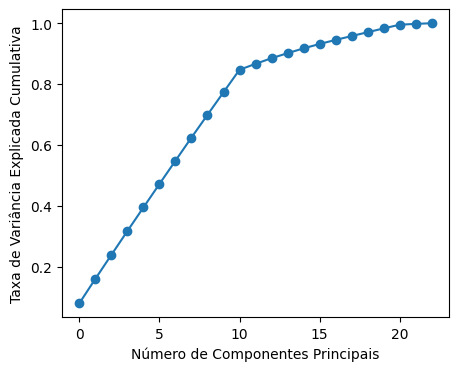

In [62]:
# Faz o PCA para cada quantidade de componente disponível na base X
pca = PCA(random_state=42)
pca.fit(X)

# Calcula e prepara o vetor com os valores de Taxa de Variância Explicada 
taxa_variancia_explicada = pca.explained_variance_ratio_
taxa_variancia_cumulativa = np.cumsum(taxa_variancia_explicada)

# Faz o gráfico da taxa pelo número de componentes
plt.plot(taxa_variancia_cumulativa, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Taxa de Variância Explicada Cumulativa')
plt.show()

> Verifica-se que com 10 componentes principais, há mais de 80% da Taxa de Variância Explicada. Além disso, o crescimento da taxa diminui muito quando há mais de 10 componentes. Logo, essa será a quantidade utilizada nos ajustes.

In [64]:
# Faz o PCA com 10 componentes sobre as variáveis explicativas
pca10 = PCA(n_components=10, random_state=42)
pca10.fit(X)
X_transformado = pca10.transform(X)

# Faz o dataframe com PCA = 10
X = pd.DataFrame(data=X_transformado, columns=[f'PC{i}' for i in range(1,11)])
X.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.311875  0.362679  0.685153  0.492231  0.135841 -1.412764 -1.477632   
1 -1.630528  1.510379  0.349383 -0.173592  1.435154  0.104712 -0.876063   
2  1.699484 -0.192148 -0.257965  1.224319 -1.737045  1.271944 -0.363776   
3  2.244343  0.816964 -0.306065 -0.213506 -0.584660  0.009924 -0.088298   
4 -1.372306  0.656633 -0.459653 -1.836000 -1.004065  0.560915  1.647017   

        PC8       PC9      PC10  
0 -0.769643 -1.218005  0.573494  
1 -1.028653 -0.743288  0.798188  
2 -1.061420 -0.381938 -2.307189  
3  1.241818 -1.412535 -0.327525  
4  0.900603 -1.414061  1.039425

## 5. Modelagem

Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:

- **Selecionar a técnica de modelagem**:
  
Considerando que a variável resposta é categórica (mesmo sendo numérica, são valores inteiros como classe), será utilizada a técnica de Regressão Logística (Logistic Regression).

- **Desenho do teste**:
  
Antes de rodar o modelo precisamos construir um desenho do teste que será realizado. Para desenvolver um modelo como este, é necessário dividir a base em duas, uma chamada treinamento, onde o algoritmo 'aprende' utilizando 70% dos dados, e outra chamada teste, onde o algoritmo é avaliado a partir dos 30% restantes. Essa prática fornece uma métrica de avaliação mais fidedigna do algoritmo.

- **Avaliação do modelo**:

O modelo será avaliado a partir da sua acurácia, na qual, quanto mais próxima a 1, mais condizente o ajuste está com os valores verdadeiros da variável resposta.

### 5.1 Desenho do teste

In [67]:
# Separa a base em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    train_size=0.7, 
                                                    random_state=42)

### 5.2 Regressão Logística

In [69]:
# Prepara o comando de regressão Logística
reg = LogisticRegression()

# Ajusta a base de treino à regressão Logística
reg = reg.fit(X_train, y_train)

### 5.3 Avaliação dos Resultados

In [71]:
# Faz a predição na base de teste
y_pred = reg.predict(X_test)

# Avalia a acurácia do ajuste
print(f'A acurácia do ajuste foi de: {100*reg.score(X_test, y_test):.2f}%.')

A acurácia do ajuste foi de: 9.47%.


> A baixa acurácia pode estar ligada à baixa variabilidade dos valores do dataframe inicial, fazendo com que nenhum deles tenha uma correlação notável com a variável resposta.